# Statistical & Visual exploratory analysis of Wine types & quality

> *"Wine is bottled poetry"* - Robert Louis Stevenson

The words of famous Scottish novelist and poet cannot be more true! 
We always wonder, what separates an average wine from great. Wouldn't it be interesting to delve into this problem and resort to good old statistical analysis to find the answer?    
Fortunately, UC Irvine ML repository already has us covered with a wonderful [Wine Quality Data Set](!https://archive.ics.uci.edu/ml/datasets/wine+quality). It has two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available.     

**Objective:**    
The goal of the following analysis is model wine quality based on its physicochemical attributes    

**Stepwise Analysis:**    
A systematic approach is followed through these steps:   
1. Data preprocessing & feature engineering    
2. Exploratory analysis:    
    2.1. Descriptive statistics    
    2.2. Inferential statistics    
    2.3. Univariate analysis    
    2.4. Multivariate analysis     
(All the analysis is accompanied by appropriate chart/ plots that aid in visual exploration of trends/ relationships in attributes)

In [1]:
#Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

### 1. Data preprocessing and feature engineering

We need to merge the data from separate files for red and white wines. In order to identify the type of wine after merging the datasets, we would introduce a new feature *"wine_type"*.    

In [2]:
dfWhiteWine = pd.read_csv("winequality-white.csv", sep=";")
dfWhiteWine["wine_type"] = "white"
dfRedWine = pd.read_csv("winequality-red.csv", sep=";")
dfRedWine["wine_type"] = "red"
dfWineQuality = pd.concat([dfWhiteWine, dfRedWine])
#Shuffle the records randomly
dfWineQuality = dfWineQuality.sample(frac=1, random_state=34).reset_index(drop=True)
dfWineQuality.head(n=3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.1,0.59,0.01,2.5,0.077,20.0,85.0,0.99746,3.55,0.59,9.8,5,red
1,6.5,0.26,0.32,16.5,0.045,44.0,166.0,1.00000,3.38,0.46,9.5,6,white
2,7.7,0.60,0.06,2.0,0.079,19.0,41.0,0.99697,3.39,0.62,10.1,6,red


**Transform wine quality to categorical variable**    

In [3]:
dfWineQuality.quality.unique()

array([5, 6, 7, 3, 4, 8, 9], dtype=int64)

We notice that wine quality is rated numerically in range [3,9]. We would like to categorize wine quality according to this rating as follows:   
1. *High quality:* rating 8,9    
2. *Medium quality:* rating 6,7   
3. *Low quality:* rating 3,4,5    
We create a new feature *"quality_category"* based on these categories

In [4]:
dfWineQuality['quality_category'] = dfWineQuality['quality'].apply(lambda q: 'low'
                                                                  if q <= 5 else 'medium'
                                                                  if q <= 7 else 'high')
#Transform quality_category to a categorical feature 
#dfWineQuality['quality_category'] = pd.Categorical.from_codes(dfWineQuality['quality'], categories=['low', 'medium', 'high'])
dfWineQuality['quality_category'] = dfWineQuality['quality_category'].astype('category')
dfWineQuality['quality_category'].unique()

[low, medium, high]
Categories (3, object): [low, medium, high]

### 2. Problem Statement
We now formulate the objective of our analysis as prediction of following labels based on other features:   
1. Wine Type (Red/ White)   
2. Wine Quality (low/ medium/ high)    

### 3. Statistical Analysis     
We start by visualising and statistically analysing various features of the wine    
### 3.1. Descriptive Statistics   
We explore the sample distribution, mean, median, standard deviation and other statistics for the features

**(1) Distribution by wine type**   
We find that we have an unequal number of samples of white and red wines. We need to keep this in mind as we build and intrepret any statistical model with this data in future.

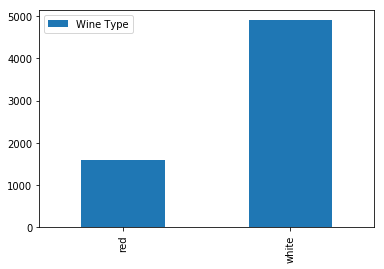

In [5]:
df = dfWineQuality.groupby('wine_type').count().reset_index().iloc[:,[0,1]]
df = df.T
df.columns = ["red", "white"]
df = df.reset_index().T.iloc[1:,1:]
df.columns = ['Wine Type']
df.plot.bar()

**(2) Summary of statistics (by Wine Types) **    
We calculate and summarize various descriptive statistics of wine features those could be useful in our objective of prediction modelling. We group these statistics according to wine types (Red or White)

In [6]:
#Create a subset of features
wineFeatures = ['residual sugar', 'total sulfur dioxide', 'sulphates',
'alcohol', 'volatile acidity', 'quality']
#Round off the features upto 2 decimal places
whiteStats =  round(dfWhiteWine[wineFeatures].describe(), 2)
redStats = round(dfRedWine[wineFeatures].describe(), 2)
#Create a combined table
pd.concat([whiteStats, redStats], keys=["Statistics - White wine", "Statistics - Red wine"], axis = 1)

Statistics - White wine                                          \
               residual sugar total sulfur dioxide sulphates  alcohol   
count                 4898.00              4898.00   4898.00  4898.00   
mean                     6.39               138.36      0.49    10.51   
std                      5.07                42.50      0.11     1.23   
min                      0.60                 9.00      0.22     8.00   
25%                      1.70               108.00      0.41     9.50   
50%                      5.20               134.00      0.47    10.40   
75%                      9.90               167.00      0.55    11.40   
max                     65.80               440.00      1.08    14.20   

                                Statistics - Red wine                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          4898.00  4898.00               1599.00              1599.00   
mean              0.28     5.88                  2.54                46.47   
std               0.10     0.89                  1.41                32.90   
min               0.08     3.00                  0.90                 6.00   
25%               0.21     5.00                  1.90                22.00   
50%               0.26     6.00                  2.20                38.00   
75%               0.32     6.00                  2.60                62.00   
max               1.10     9.00                 15.50               289.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   1599.00  1599.00          1599.00  1599.00  
mean       0.66    10.42             0.53     5.64  
std        0.17     1.07             0.18     0.81  
min        0.33     8.40             0.12     3.00  
25%        0.55     9.50             0.39     5.00  
50%        0.62    10.20             0.52     6.00  
75%        0.73    11.10             0.64     6.00  
max        2.00    14.90             1.58     8.00

<i>**Observations:**</i>       
1. Mean *residual sugar* and *total sulphur dioxide* content seems to be considerably *higher* in white wine than red win
2. Mean *sulphates* and *volatile acidity* is seen to be *lower* for white wines than red ones.    
3. Mean alcohol content of both types of wines appears to be similar i.e. around 10%

**(3) Summary of statistics (by Wine Quality) **    
Now, we group summary statistics as per wine quality.

In [7]:
wineFeatures = ['pH', 'alcohol', 'volatile acidity', 'sulphates']
lowStats =  round(dfWineQuality[dfWineQuality.quality_category == 'low'][wineFeatures].describe(), 2)
mediumStats = round(dfWineQuality[dfWineQuality.quality_category == 'medium'][wineFeatures].describe(), 2)
highStats = round(dfWineQuality[dfWineQuality.quality_category == 'high'][wineFeatures].describe(), 2)
pd.concat([lowStats, mediumStats, highStats], 
          keys=["Low quality", "Medium quality", "High quality"], axis = 1)

Low quality                                     Medium quality           \
               pH  alcohol volatile acidity sulphates             pH  alcohol   
count     2384.00  2384.00          2384.00   2384.00        3915.00  3915.00   
mean         3.21     9.87             0.40      0.52           3.22    10.81   
std          0.16     0.84             0.19      0.14           0.16     1.20   
min          2.74     8.00             0.10      0.25           2.72     8.40   
25%          3.11     9.30             0.26      0.44           3.11     9.80   
50%          3.20     9.60             0.34      0.50           3.21    10.80   
75%          3.31    10.40             0.50      0.58           3.33    11.70   
max          3.90    14.90             1.58      2.00           4.01    14.20   

                                 High quality                           \
      volatile acidity sulphates           pH alcohol volatile acidity   
count          3915.00   3915.00       198.00  198.00           198.00   
mean              0.31      0.54         3.23   11.69             0.29   
std               0.14      0.15         0.16    1.27             0.12   
min               0.08      0.22         2.88    8.50             0.12   
25%               0.21      0.43         3.13   11.00             0.21   
50%               0.27      0.51         3.23   12.00             0.28   
75%               0.36      0.61         3.33   12.60             0.35   
max               1.04      1.95         3.72   14.00             0.85   

                 
      sulphates  
count    198.00  
mean       0.51  
std        0.16  
min        0.25  
25%        0.38  
50%        0.48  
75%        0.60  
max        1.10

**Observations:**      
1. Mean *volatile acidity* seems to drop as wine quality increases
2. Mean *pH* and *sulphates* seem to be consistent irrespective of the wine quality    
3. Noticeably, mean *alcohol* content appears to be gradually increasing with wine quality     

### 3.2. Inferential Statistics     
We have calculated various statistics for different features from the wine samples. However, we need to build and evaluate appropriate statistical models to infer about the entire population of wines in general. Let us formulate some hypothesis that will allow us to comment about population paramters with reasonable confidence:    
**Hypothesis Test: **
1. **pH values** are similar accross all wine quality groups:       
*Null hypothesis:* The mean pH of low, medium and high quality wines is same    
*Alternative hypothesis:* There is a statistically significant difference between pH means of three wine quality groups    
2. **Alcohol content** is significantly different accross wine quality groups:   
*Null hypothesis:* There is a statistically significant difference between alcohol content of three wine quality groups  
*Alternative hypothesis:* The alcohol content of three wine quality groups is similar

**One sided ANOVA test:**    
We employ a one-way ANOVA F-test to test the above stated hypothesis at the 0.05 significance level

In [26]:
def ANOVATestResults(feature):
    F, p = stats.f_oneway(dfWineQuality[dfWineQuality.quality_category == 'low'][[feature]],
                     dfWineQuality[dfWineQuality.quality_category == 'medium'][[feature]],
                     dfWineQuality[dfWineQuality.quality_category == 'high'][[feature]]) 

    print("\nANOVA test for mean "+ feature +" levels across wine samples with different quality ratings\n------------------------------------------------------------------------")
    print('F Statistic:{} \tp-value: {}'.format(round(F[0],4), p[0]))

ANOVATestResults('pH')
ANOVATestResults('alcohol')
ANOVATestResults('sulphates')


ANOVA test for mean pH levels across wine samples with different quality ratings
------------------------------------------------------------------------
F Statistic:1.2364 	p-value: 0.2905002779768688

ANOVA test for mean alcohol levels across wine samples with different quality ratings
------------------------------------------------------------------------
F Statistic:673.0745 	p-value: 2.2715337450621843e-266

ANOVA test for mean sulphates levels across wine samples with different quality ratings
------------------------------------------------------------------------
F Statistic:6.8849 	p-value: 0.0010305533421903841


**Observations:**      
1. p-value for ANOVA test of pH levels is significantly higher than 0.05. So, we **cannot reject** the *null hypothesis* and infer that pH levels are *not likely to be different* accross wine qualities    
2. However, Alcohol levels are quite likely to be different from each other across various qualities of wine as p-value is significantly below the threshold of 0.05     
3. Similarly, owing to a significantly smaller p-value, we can infer that mean sulphate levels are most likely to be different across the various qualities of wine    

**Visualize the statistical results:**    
 - We would like to visually ascertain our inferences from statistical tests

Text(0,0.5,'Wine sulphates')

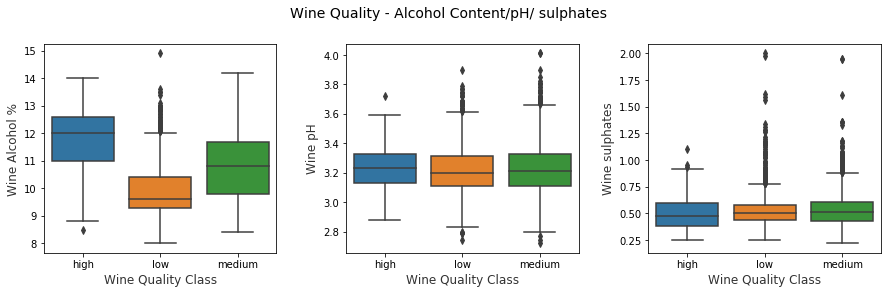

In [37]:
f,(ax1,  ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
f.suptitle('Wine Quality - Alcohol Content/pH/ sulphates', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

sns.boxplot(x="quality_category", y="alcohol",
            data=dfWineQuality, ax=ax1)
ax1.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_category", y="pH", data=dfWineQuality, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine pH",size = 12,alpha=0.8)

sns.boxplot(x="quality_category", y="sulphates", data=dfWineQuality, ax=ax3)
ax3.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax3.set_ylabel("Wine sulphates",size = 12,alpha=0.8)

The box plots seem to confirm the results of our ANOVA test as we see differences in median values for alcohol content as well as sulpahtes but not so much for pH

### 3.3. Univariate Analysis   
Before we study the regression/ correlation between any of the variables, we would like to analyze them individually. Such an analysis which does not involve any interaction between features, but aims to study only a single variable at a time, is known as *univariate analysis*     
We start by analyzing the distributions of different variables using histograms

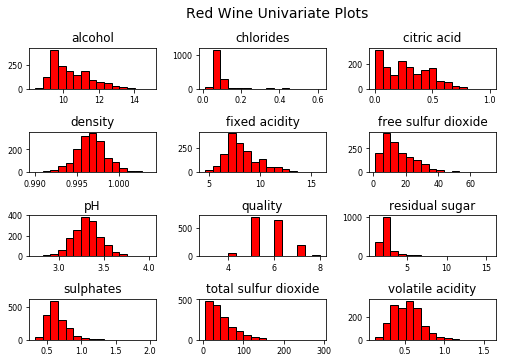

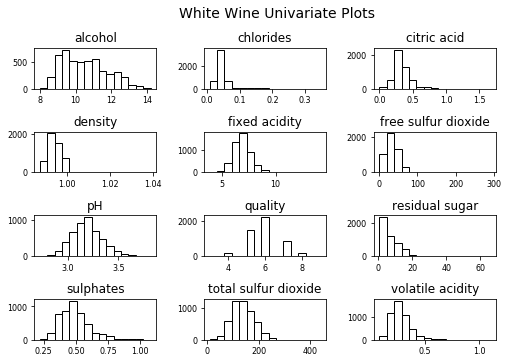

In [38]:
dfRedWine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=14)  

dfWhiteWine.hist(bins=15, color='white', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
wt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=14)

**Comparison of variable distribution: Red vs White wine**    
Now, we would like to compare the individual features of red and white wines against each other and check if observe any interesting patterns   

In [62]:
def compare_univariate(feature):
    """
    Function to compare univariate distribution of red vs white wines
    Plots the feature's histogram side by side
    input: feature - string - name of the feature to be compared
    """
    fig = plt.figure(figsize = (10, 4))
    title = fig.suptitle(f"{feature.title()} Content in Wine", fontsize=14)
    fig.subplots_adjust(top=0.85, wspace=0.3)

    ax1 = fig.add_subplot(1,2, 1)
    ax1.set_title("Red Wine")
    ax1.set_xlabel(f"{feature.title()}")
    ax1.set_ylabel("Frequency") 
    ax1.set_ylim([0, 1200])
    ax1.text(1.2, 800, r'$\mu$='+str(round(dfRedWine[feature].mean(),2)), 
             fontsize=12)
    r_freq, r_bins, r_patches = ax1.hist(dfRedWine[feature], color='red', bins=15,
                                        edgecolor='black', linewidth=1)

    ax2 = fig.add_subplot(1,2, 2)
    ax2.set_title("White Wine")
    ax2.set_xlabel(f"{feature.title()}")
    ax2.set_ylabel("Frequency")
    ax2.set_ylim([0, 1200])
    ax2.text(0.8, 800, r'$\mu$='+str(round(dfWhiteWine[feature].mean(),2)), 
             fontsize=12)
    w_freq, w_bins, w_patches = ax2.hist(dfWhiteWine[feature], color='white', bins=15,
                                        edgecolor='black', linewidth=1)

**(1) Sulphates content**     
We notice that sulphate content in red wines is slightly more than that of white wines. Earlier we inferred about the difference between them, but now we see the actual comparison

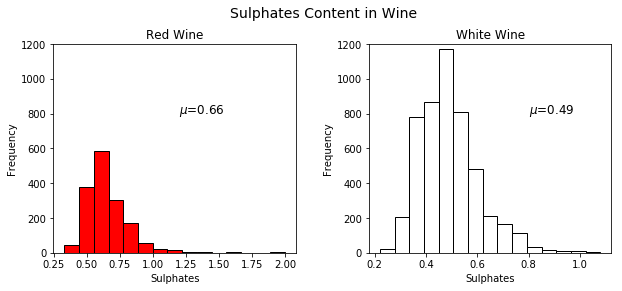

In [63]:
compare_univariate('sulphates')

**(2) Residual Sugar**     
From the distribution plots below, it is quite evident that most varieties of white wines have higher residual sugar content than red wines

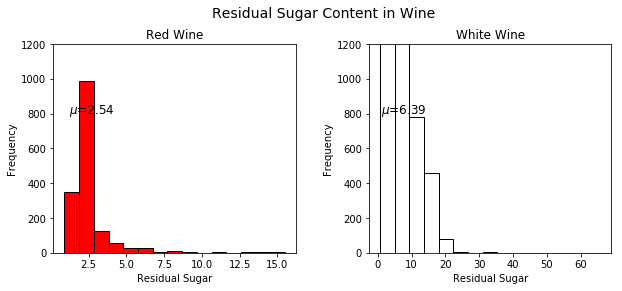

In [64]:
compare_univariate('residual sugar')

### 3.4. Multivariate Analysis     
We have seen pretty interesting distributions of features in univariate analysis. Now, we move on to find the relationship between the physicochemical features of the wine. Thus, we now proceed with *"multivariate analysis"*     
#### 1. Correlation plot:
 A correlation plot is very useful to look at the correlation coefficient between each feature of the wine. We plot a correlation matrix in an intuitive heatmap.    

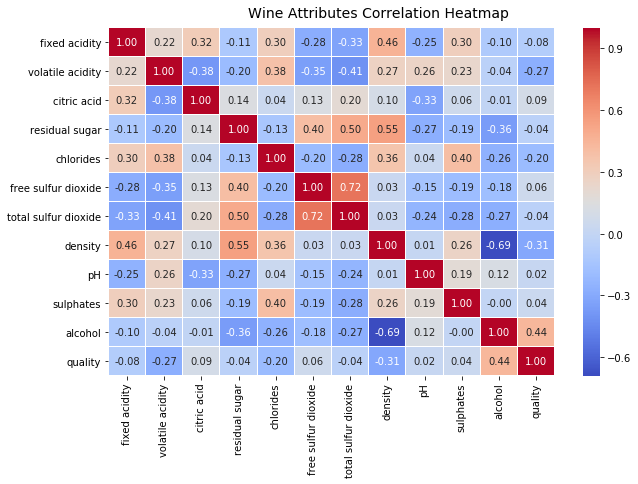

In [80]:
f, ax = plt.subplots(figsize=(10, 6))
corr = dfWineQuality.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

#### Observations:    
We do not observe very high correlations between most attributes but there are a few significant correlations:    
1. **Alcohol vs Quality:** It seems higher alcohol is correlated with better quality (positive correlation)     
2. **Alcohol vs density:** Alcohol and density are negatively correlated, i.e. wines with higher alcohol percentage are found to have lower densities     
3. **Density vs residual sugar:** The wines with more residual sugar content are found to have higher density

#### 2. Pairwise relationship plot:    
Now, we explore relationships between pairs of different attributes using pairwise plots    

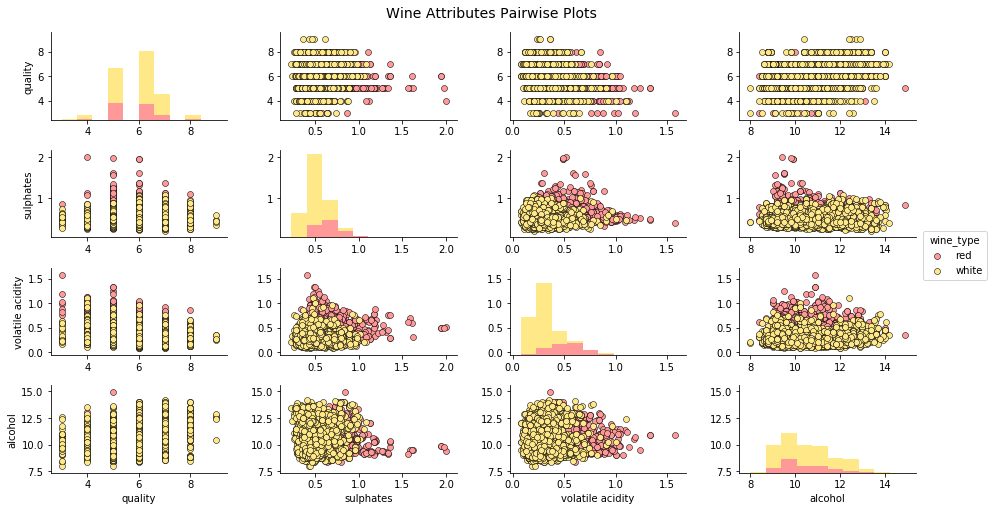

In [97]:
cols = ['wine_type', 'quality', 'sulphates', 'volatile acidity', 'alcohol']
pp = sns.pairplot(dfWineQuality[cols], hue='wine_type', size=1.8, aspect=1.8, 
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

### Observations:    
1. Lower sulphate contents are related to better wine quality    
2. Similarly, lower levels of volatile acids seem to be associated with better wine quality     
3. On an average, sulphate contents are higher in red wine than white   
4. Average volatile acidity is higher in red wines than white    
Thus, the observations from pairwise plots further cement our earlier observations & inferences